In [1]:
import rawgribcodec
from kerchunk.combine import MultiZarrToZarr

In [2]:
mzz = MultiZarrToZarr(
    "test_out/*.json",
    remote_protocol="file",
    xarray_open_kwargs={
        #"preprocess": drop_coords,
        "decode_cf": False,
        "mask_and_scale": False,
        "decode_times": False,
        "decode_timedelta": False,
        "use_cftime": False,
        "decode_coords": False
    },
    xarray_concat_args={
        "dim": "time",
    }
)

mzz.translate("mzz.json")

In [3]:
import xarray as xr

In [4]:
ds = xr.open_zarr("reference::mzz.json", consolidated=False)
ds

<xarray.Dataset>
Dimensions:  (time: 8762, values: 20971520)
Coordinates:
  * time     (time) datetime64[us] 2020-04-01 2020-04-01T00:30:00 ... 2020-10-01
Dimensions without coordinates: values
Data variables: (12/20)
    albedo   (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    clivi    (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    cllvi    (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    clt      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    cosmu0   (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    dew2     (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    ...       ...
    sic      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    sit      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    tas      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    ts       (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    uas      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    vas      (time, values) float64 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
Attributes:
    centre:             mpim
    centreDescription:  Max Planck Institute for Meteorology 
    edition:            2
    subCentre:          3

In [5]:
%matplotlib inline
import matplotlib.pylab as plt

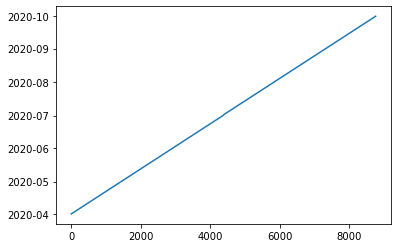

In [6]:
plt.plot(ds.time.values)

CPU times: user 1min 41s, sys: 1min 2s, total: 2min 44s
Wall time: 25.2 s


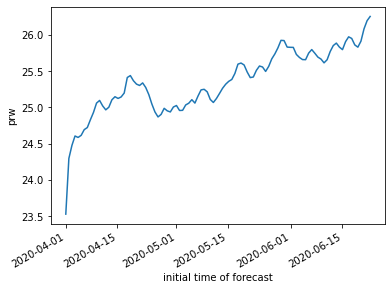

In [9]:
%%time
ds.prw.isel(time=slice(1, 4001, 40)).mean("values").load().plot()